In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()  # for plot styling
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
#importing the dataset
data = pd.read_csv('driver-data.csv')
print (data.shape)
print (data.head())

(4000, 3)
           id  mean_dist_day  mean_over_speed_perc
0  3423311935          71.24                    28
1  3423313212          52.53                    25
2  3423313724          64.54                    27
3  3423311373          55.69                    22
4  3423310999          54.58                    25


In [4]:
newdata=data.iloc[:,1:]
newdata.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


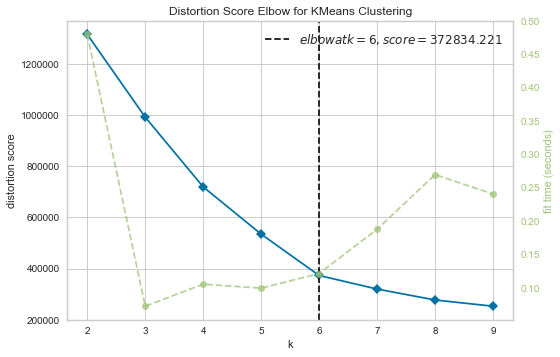

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD373A65C0>,
         k=None, locate_elbow=True, metric='distortion', model=None,
         timings=True)

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), newdata, k=(2,10))

In [10]:
# Using the KMeans from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.cluster_centers_

array([[ 41.50186944,   5.39169139],
       [196.74984848,  11.30606061],
       [ 57.84015183,   5.28640442],
       [176.55112245,  71.84693878],
       [ 50.61421836,  33.06203474],
       [166.08655914,  10.37634409]])

In [12]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[4 4 4 ... 5 5 5]
4000


In [13]:
final =newdata
final['cluster']=kmeans.labels_

In [15]:
final.head()

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,4
1,52.53,25,4
2,64.54,27,4
3,55.69,22,4
4,54.58,25,4


{0: 1347, 1: 329, 2: 1450, 3: 98, 4: 403, 5: 373}


D:\softwares\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


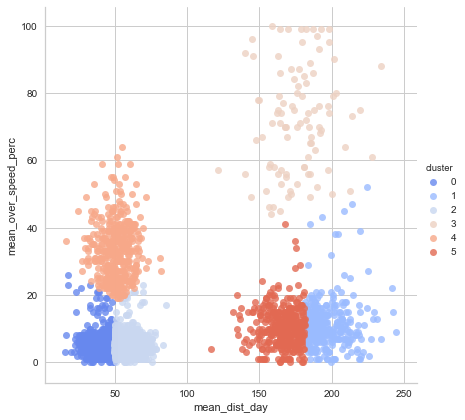

In [17]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))
# plot the data 
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc',data=newdata, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)